# Unsprivised Learning 


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [79]:
df = pd.read_csv("../../classData.csv")

In [80]:
df['fault_type'] = df[['G', 'C', 'B', 'A']].astype(str).agg(''.join, axis=1)
df

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,fault_type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001
...,...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,0000
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,0000
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,0000
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,0000


In [81]:
# input_cols = ['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']
# unique_faults = df['fault_type'].unique()

# colors = plt.cm.get_cmap('tab10', len(unique_faults))

# for in_col in input_cols:
#     plt.figure(figsize=(10, 5))
#     for i, fault in enumerate(unique_faults):
#         subset = df[df['fault_type'] == fault]
#         plt.hist(subset[in_col], bins=30, alpha=0.5, density=True,
#                  label=f'Fault {fault}', color=colors(i))

In [82]:
train , valid , test = np.split(df.sample(frac = 1) , [int(0.6 * len(df)) , int(0.8 * len(df))])

c:\Users\OussamaTab\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [83]:
def scale_dataset(dataFrame):
    # x = dataFrame[['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']].values
    y = dataFrame[['G', 'C', 'B', 'A']].values
    input_cols = ['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']
    x = df[input_cols]    

    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    y = y.dot(np.array([8, 4, 2, 1]))
    return  x, y

In [84]:
# print(len(train[train["G"] == 1] ))
# print(len(train[train["G"] == 0] ))
X_train , Y_train = scale_dataset(train)
# X_valid , Y_valid = scale_dataset(valid)
# X_test , Y_test = scale_dataset(test)



In [85]:
Y_train

array([ 0,  0, 15, ...,  0,  0,  7], shape=(4716,))

# Models

## KMeans

In [86]:
from sklearn.cluster import KMeans

In [87]:
from sklearn.preprocessing import StandardScaler


# Now fit KMeans on scaled data
kmeans = KMeans(n_clusters=6, random_state=42)
y_pred = kmeans.fit_predict(X_train)


In [88]:
# df_kmeans = df 
# df_kmeans['class'] = y_pred

# df_kmeans.head() 
y_pred

array([4, 4, 4, ..., 3, 3, 3], shape=(7861,), dtype=int32)

In [89]:
# Encode true labels
true_labels_encoded = encoder.fit_transform(df['fault_type'])

# Evaluate
print(confusion_matrix(true_labels_encoded, y_pred))
print(classification_report(true_labels_encoded, y_pred))
print(accuracy_score(true_labels_encoded, y_pred))


[[  0   0 843 759 763   0]
 [228 405   0 129 242   0]
 [266 397   0 126   3 304]
 [  0   0 375 457  34 263]
 [  0 276  84 378   3 393]
 [266 396   0 163   3 305]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2365
           1       0.27      0.40      0.33      1004
           2       0.00      0.00      0.00      1096
           3       0.23      0.40      0.29      1129
           4       0.00      0.00      0.00      1134
           5       0.24      0.27      0.25      1133

    accuracy                           0.15      7861
   macro avg       0.12      0.18      0.15      7861
weighted avg       0.10      0.15      0.12      7861

0.14883602595089684


<IPython.core.display.Javascript object>

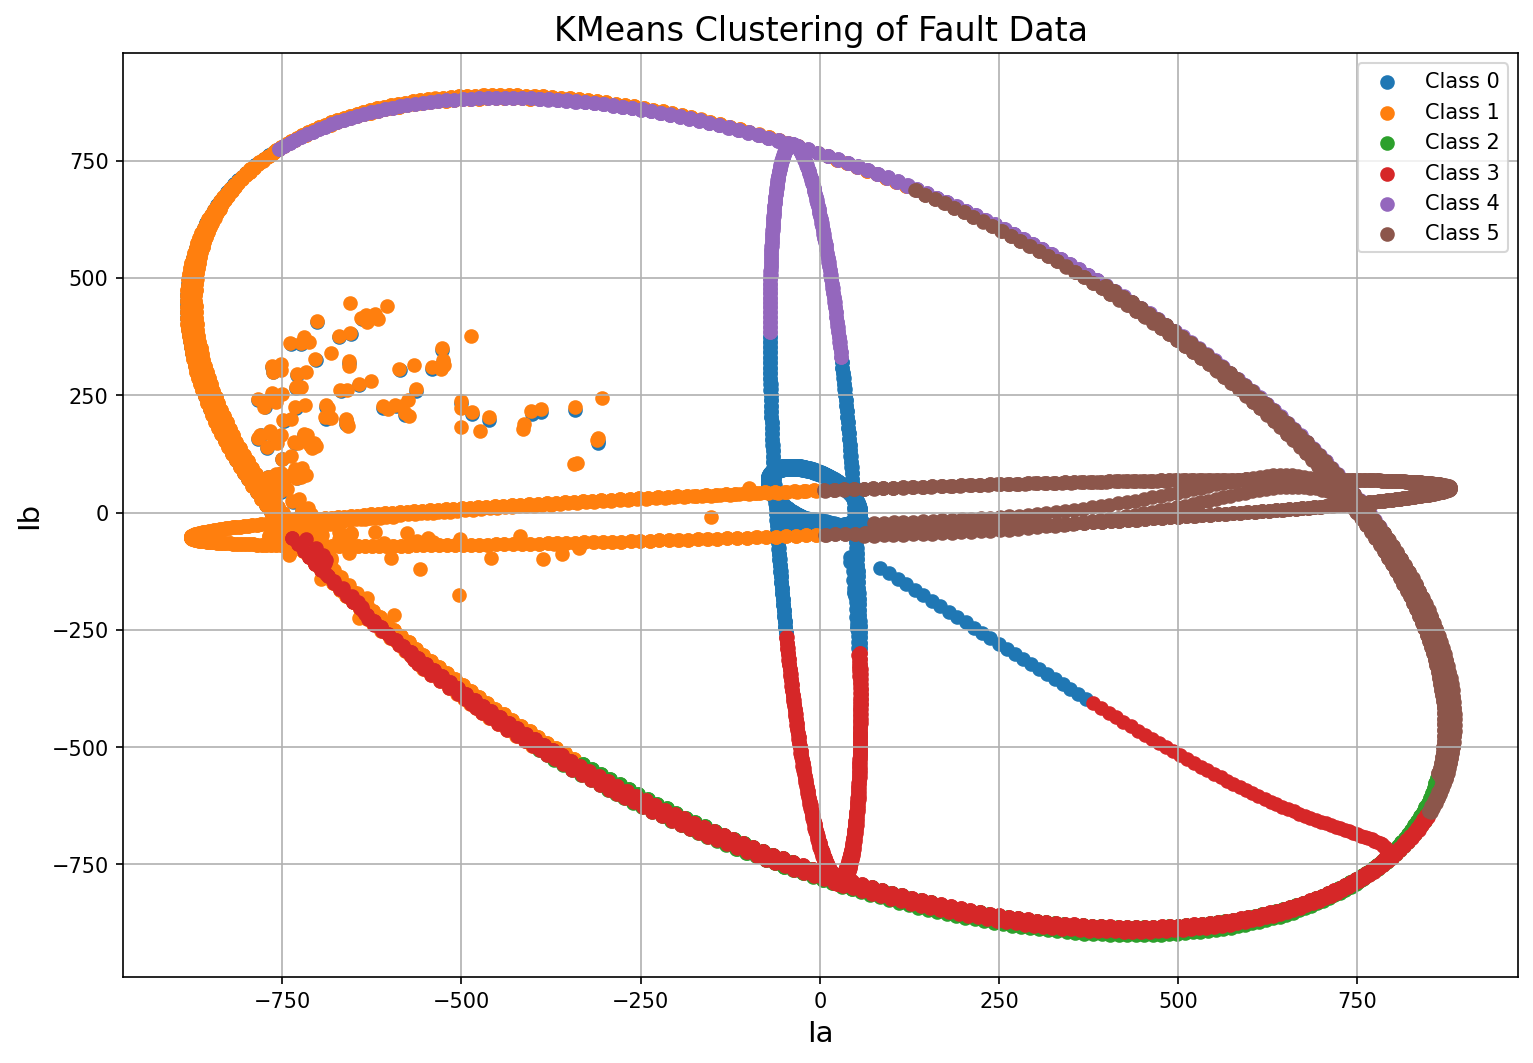

In [90]:
df0 = df_kmeans[df_kmeans['class'] == 0]
df1 = df_kmeans[df_kmeans['class'] == 1]
df2 = df_kmeans[df_kmeans['class'] == 2]
df3 = df_kmeans[df_kmeans['class'] == 3]
df4 = df_kmeans[df_kmeans['class'] == 4]
df5 = df_kmeans[df_kmeans['class'] == 5]

# Plotting (for example using two features: Ia and Ib)
plt.figure(figsize=(12, 8), dpi=150)

plt.scatter(df0['Ia'], df0['Ib'], label='Class 0')
plt.scatter(df1['Ia'], df1['Ib'], label='Class 1')
plt.scatter(df2['Ia'], df2['Ib'], label='Class 2')
plt.scatter(df3['Ia'], df3['Ib'], label='Class 3')
plt.scatter(df4['Ia'], df4['Ib'], label='Class 4')
plt.scatter(df5['Ia'], df5['Ib'], label='Class 5')

plt.xlabel('Ia', fontsize=14)
plt.ylabel('Ib', fontsize=14)
plt.title('KMeans Clustering of Fault Data', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>

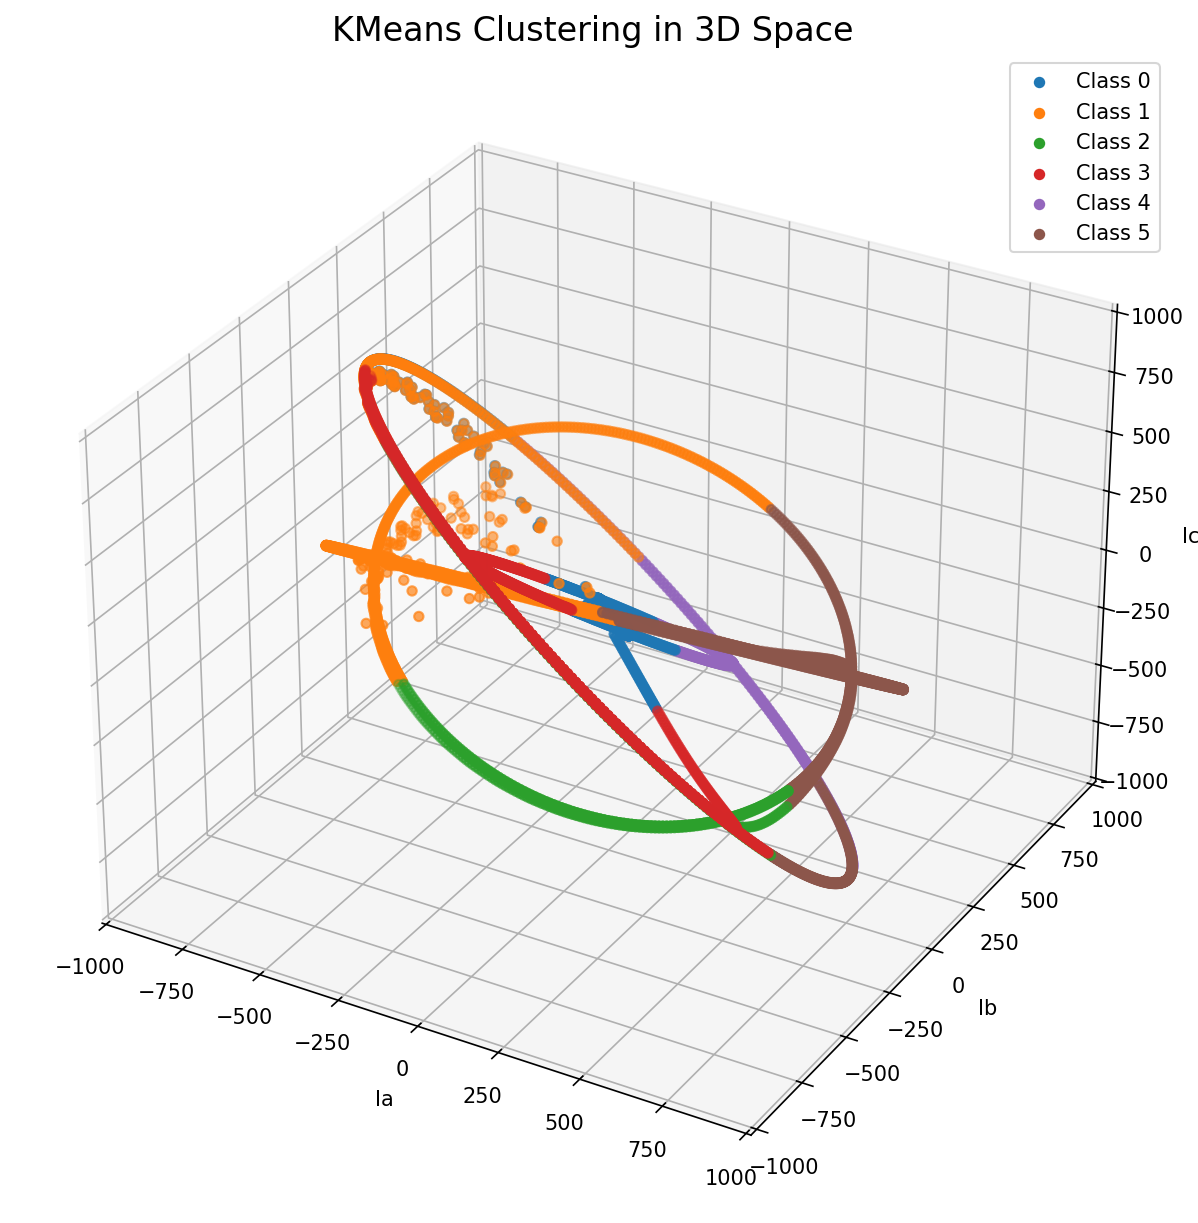

In [91]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 10), dpi=150)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df0['Ia'], df0['Ib'], df0['Ic'], label='Class 0')
ax.scatter(df1['Ia'], df1['Ib'], df1['Ic'], label='Class 1')
ax.scatter(df2['Ia'], df2['Ib'], df2['Ic'], label='Class 2')
ax.scatter(df3['Ia'], df3['Ib'], df3['Ic'], label='Class 3')
ax.scatter(df4['Ia'], df4['Ib'], df4['Ic'], label='Class 4')
ax.scatter(df5['Ia'], df5['Ib'], df5['Ic'], label='Class 5')

ax.set_xlabel('Ia')
ax.set_ylabel('Ib')
ax.set_zlabel('Ic')
ax.set_title('KMeans Clustering in 3D Space', fontsize=16)
ax.legend()
plt.show()


<IPython.core.display.Javascript object>

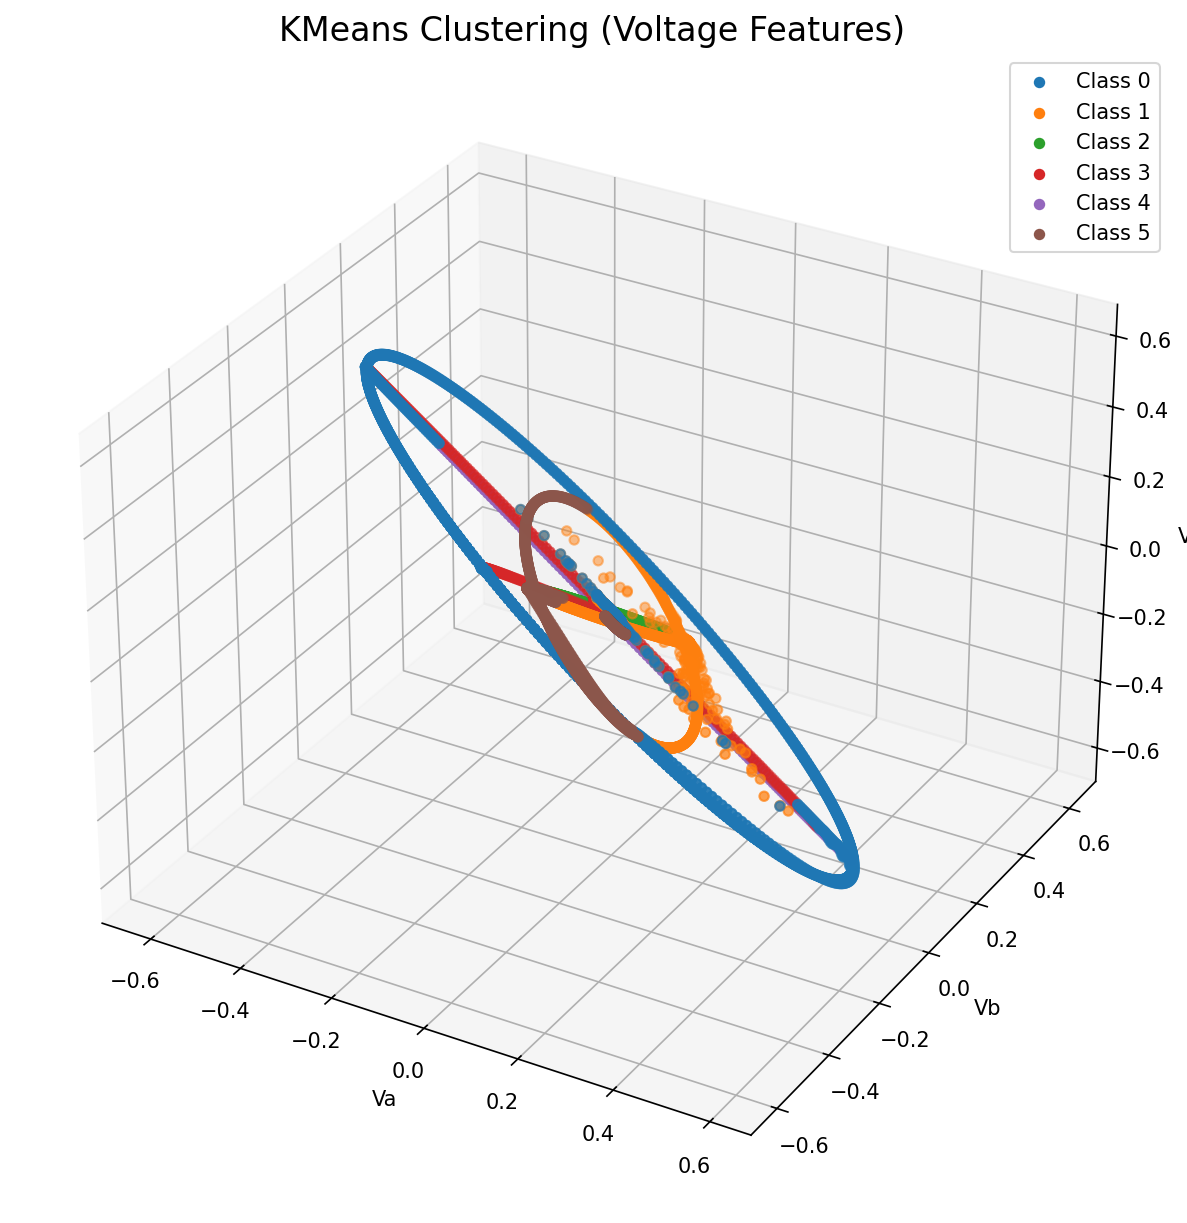

In [92]:
# Only once at the top (in Jupyter Notebook or JupyterLab)
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 10), dpi=150)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df0['Va'], df0['Vb'], df0['Vc'], label='Class 0')
ax.scatter(df1['Va'], df1['Vb'], df1['Vc'], label='Class 1')
ax.scatter(df2['Va'], df2['Vb'], df2['Vc'], label='Class 2')
ax.scatter(df3['Va'], df3['Vb'], df3['Vc'], label='Class 3')
ax.scatter(df4['Va'], df4['Vb'], df4['Vc'], label='Class 4')
ax.scatter(df5['Va'], df5['Vb'], df5['Vc'], label='Class 5')

ax.set_xlabel('Va')
ax.set_ylabel('Vb')
ax.set_zlabel('Vc')
ax.set_title('KMeans Clustering (Voltage Features)', fontsize=16)
ax.legend()
plt.show()


In [93]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Assuming df['fault_type'] has the true labels (actual classes)
true_labels = df['fault_type']
print(type(true_labels))
print(type(y_pred))



<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [94]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Encode true_labels to numbers
encoder = LabelEncoder()
true_labels_encoded = encoder.fit_transform(true_labels)

# Now both true_labels_encoded and y_pred are numeric (0, 1, 2, 3, ...)

# Step 2: Now compute the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print("Confusion Matrix:")
print(confusion_matrix(true_labels_encoded, y_pred))

print("\nClassification Report:")
print(classification_report(true_labels_encoded, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(true_labels_encoded, y_pred))


Confusion Matrix:
[[  0   0 843 759 763   0]
 [228 405   0 129 242   0]
 [266 397   0 126   3 304]
 [  0   0 375 457  34 263]
 [  0 276  84 378   3 393]
 [266 396   0 163   3 305]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2365
           1       0.27      0.40      0.33      1004
           2       0.00      0.00      0.00      1096
           3       0.23      0.40      0.29      1129
           4       0.00      0.00      0.00      1134
           5       0.24      0.27      0.25      1133

    accuracy                           0.15      7861
   macro avg       0.12      0.18      0.15      7861
weighted avg       0.10      0.15      0.12      7861


Accuracy Score:
0.14883602595089684


## DBSCAN

In [95]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
y_pred = dbscan.fit_predict(X_train)
y_pred

array([-1,  0,  0, ...,  0,  0,  0], shape=(7861,))

In [96]:
print(confusion_matrix(true_labels_encoded, y_pred))
print(classification_report(true_labels_encoded, y_pred))
print(accuracy_score(true_labels_encoded, y_pred))


[[   0    0    0    0    0    0    0]
 [   0 2365    0    0    0    0    0]
 [   0 1004    0    0    0    0    0]
 [   3 1093    0    0    0    0    0]
 [   1 1128    0    0    0    0    0]
 [   1 1133    0    0    0    0    0]
 [   3 1130    0    0    0    0    0]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.30      1.00      0.46      2365
           1       0.00      0.00      0.00      1004
           2       0.00      0.00      0.00      1096
           3       0.00      0.00      0.00      1129
           4       0.00      0.00      0.00      1134
           5       0.00      0.00      0.00      1133

    accuracy                           0.30      7861
   macro avg       0.04      0.14      0.07      7861
weighted avg       0.09      0.30      0.14      7861

0.3008523088665564


c:\Users\OussamaTab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\OussamaTab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\OussamaTab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(aver

## Agglomerative Clustering

In [97]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=6)
y_pred = agglo.fit_predict(X_train)


In [98]:
print(confusion_matrix(true_labels_encoded, y_pred))
print(classification_report(true_labels_encoded, y_pred))
print(accuracy_score(true_labels_encoded, y_pred))


[[522   0 543 768   0 532]
 [  0 325   0 189 242 248]
 [342 484  62   0 208   0]
 [491   0 371 267   0   0]
 [509 271 354   0   0   0]
 [342 480 103   0 208   0]]
              precision    recall  f1-score   support

           0       0.24      0.22      0.23      2365
           1       0.21      0.32      0.25      1004
           2       0.04      0.06      0.05      1096
           3       0.22      0.24      0.23      1129
           4       0.00      0.00      0.00      1134
           5       0.00      0.00      0.00      1133

    accuracy                           0.15      7861
   macro avg       0.12      0.14      0.13      7861
weighted avg       0.14      0.15      0.14      7861

0.1495992876224399


## 3. Mean Shift

In [1]:
from sklearn.cluster import MeanShift

meanshift = MeanShift()
y_pred = meanshift.fit_predict(X_train)

NameError: name 'X_train' is not defined

In [ ]:
print(confusion_matrix(true_labels_encoded, y_pred))
print(classification_report(true_labels_encoded, y_pred))
print(accuracy_score(true_labels_encoded, y_pred))
